# Notes

In data anlytics, importing external data set (usually raw data collected by your team) is very common. The commands in package "pandas" are often used in the data set preprocessing stage. Here we will illustrate importing .csv/.txt/.xlsx files into Python and some basic preprocessing commands in "pandas".

### 1. Importing Dataset

In [ ]:
import pandas as pd

Before executing the following codes, remember to _**put the file in the same folder of your Python notebook**_. Otherwise, error message will be displayed.

```.csv file```

In [ ]:
csv_data = pd.read_csv('sample_data.csv')
print(csv_data)

```.txt file```

In [ ]:
txt_data = pd.read_csv('sample_data.txt', delimiter='\t')
print(txt_data)

      Name  Age    Country
0    Alice   30        USA
1      Bob   25     Canada
2  Charlie   35         UK
3    David   40  Australia
4      Eva   28    Germany


```.xlsx file```

In [ ]:
xlsx_data = pd.read_excel('sample_data.xlsx', engine='openpyxl')
print(xlsx_data)

      Name  Age    Country
0    Alice   30        USA
1      Bob   25     Canada
2  Charlie   35         UK
3    David   40  Australia
4      Eva   28    Germany


### 2. Preprocessing

The following are some basic codes in "pandas" package to preprocess the data set. The data set storing the daily highest temperature in Shatin from 1-10-1984 to 31-5-2025 will be used for example. It is downloaded from www.data.gov.hk.

In [ ]:
st_ht = pd.read_csv('CLMMAXT_SHA_.csv')    # Import the data set

In [ ]:
st_ht.head()                               # Display the first five rows in the data set

,Year,Month,Day,Highest Temperature
0,1984,10,1,***
1,1984,10,2,31.3
2,1984,10,3,33
3,1984,10,4,31.8
4,1984,10,5,28.5


You may observe that the data "1-10-1984" is lost. We may use the following code to replace these lost data by a specific value for building a numerical model later.

In [ ]:
# In general, we may use the following code to replace "NaN" by the value k.
# <data_set_name>.fillna(value = k, inplace = True)
# <data_set_name>.dropna(inplace = True) --> delete the rows with "NaN"

# "inplace = True" means directly amending on the original variable but not generate a new
# variable storing the processed data set. The default Python setting is "inplace = False".

In [ ]:
st_ht.fillna(value = 0, inplace = True)

In [ ]:
st_ht.replace("***", 0, inplace=True)      # Replace "***" by 0

In [ ]:
st_ht.head()

,Year,Month,Day,Highest Temperature
0,1984,10,1,0
1,1984,10,2,31.3
2,1984,10,3,33
3,1984,10,4,31.8
4,1984,10,5,28.5


We see that the data in "Month" and "Day" columns are decimal numbers. The following command can convert the data to "integer" type.

In [ ]:
st_ht['Month'] = st_ht['Month'].astype(int)
st_ht['Day'] = st_ht['Day'].astype(int)

We may also concatenate the three columns storing years, months and days to a new column called "Dates".

In [ ]:
st_ht['Date'] = st_ht['Year'].astype(str) + "-" + st_ht['Month'].astype(str).str.zfill(2) + "-" + st_ht['Day'].astype(str).str.zfill(2)

In [ ]:
st_ht.head()

,Year,Month,Day,Highest Temperature,Date
0,1984,10,1,0,1984-10-01
1,1984,10,2,31.3,1984-10-02
2,1984,10,3,33,1984-10-03
3,1984,10,4,31.8,1984-10-04
4,1984,10,5,28.5,1984-10-05


Using the following command can delete any column we don't want.

In [ ]:
st_ht.drop(columns=['Date'], inplace=True)

In [ ]:
st_ht.head()

,Year,Month,Day,Highest Temperature
0,1984,10,1,0
1,1984,10,2,31.3
2,1984,10,3,33
3,1984,10,4,31.8
4,1984,10,5,28.5


We may also carry out filtering to the data set. The following example extracts the rows in 1990 with highest termperature higher than 30 degree Celcius.

In [ ]:
c1 = st_ht['Year'] == 1990
c2 = st_ht['Highest Temperature'].astype(str) > str(30)
st_ht[c1 & c2]

,Year,Month,Day,Highest Temperature
2029,1990,4,22,30.5
2036,1990,4,29,30.2
2038,1990,5,1,30.4
2039,1990,5,2,30.3
2040,1990,5,3,30.2
...,...,...,...,...
2189,1990,9,29,30.5
2190,1990,9,30,30.7
2191,1990,10,1,31.3
2195,1990,10,5,30.9


### 3. Analysis

Any techniques about modelling can be applied to the data set. In the following exercise, regression will be carried out to the above data set.

# Exercise

1. Using the highest temperature in Shatin from 1-10-1984 to 31-5-2025, "CLMMAXT_SHA_.csv", carry out regression to the data.

(a). Continue using the variable "st_ht" which stores the data set. Extract the rows of 1 Januray in all years.

In [ ]:
con1 = st_ht['Month'] < 2
con2 = st_ht['Day'] < 2

In [ ]:
X = st_ht[con1 & con2]
X

,Year,Month,Day,Highest Temperature
92,1985,1,1,20.2
457,1986,1,1,0
822,1987,1,1,20.1
1187,1988,1,1,24.7
1553,1989,1,1,17.3
1918,1990,1,1,17.3
2283,1991,1,1,26.1
2648,1992,1,1,15.7
3014,1993,1,1,19.5
3379,1994,1,1,18.9


(b). Store the column "Year" of the extracted data set to $x$ and the column "Highest Temperature" to $y$.

In [ ]:
x = X['Year'].to_numpy().reshape(-1, 1)

In [ ]:
y = pd.to_numeric(X['Highest Temperature'].to_numpy())

(c). Split $x$ and $y$ into training set and testing set.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

(d). Fit a polynomial regression model from degree 1 to 10. Determine which degree should be selected for the final model.

In [ ]:
for i in range(1, 11):
    poly = PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x_train)
    model = LinearRegression()
    model.fit(x_poly, y_train)
    x_test_poly = poly.transform(x_test)
    y_pred = model.predict(x_test_poly)
    rss = ((y_test-y_pred)**2).sum()
    print('RSS of degree', i, 'polynomial is', rss)

RSS of degree 1 polynomial is 139.66236689637887
RSS of degree 2 polynomial is 150.3879570324221
RSS of degree 3 polynomial is 164.16101516353487
RSS of degree 4 polynomial is 164.0287002716139
RSS of degree 5 polynomial is 163.89058355309695
RSS of degree 6 polynomial is 163.7513187194397
RSS of degree 7 polynomial is 163.61091604815323
RSS of degree 8 polynomial is 163.4693865271353
RSS of degree 9 polynomial is 163.32674096295307
RSS of degree 10 polynomial is 163.18298954322975


In [ ]:
poly = PolynomialFeatures(degree = 1)    # degree 1 should be selected
x_poly = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_poly, y_train)

LinearRegression()

(e). Use the selected model to predict the highest temperature of 1 January from 2026 to 2030. Plot a graph showing the original data points and the polynomial model. Save the plot with .png format.

In [ ]:
# You may use the following command.
# plt.savefig('name_of_the_plot.png', format='png', dpi=300)

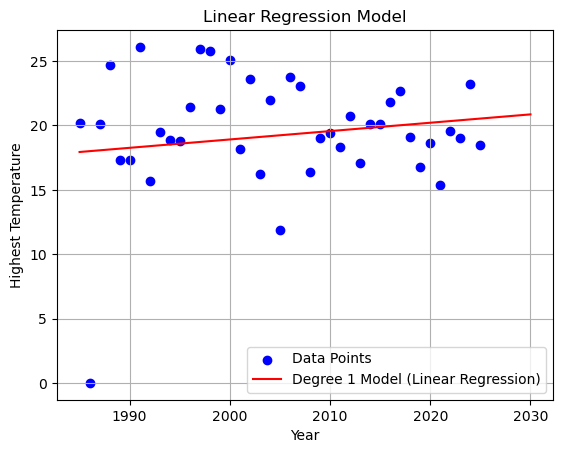

In [ ]:
import matplotlib.pyplot as plt
x_range = np.linspace(x.min(), x.max()+5, 1000).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = model.predict(x_range_poly)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_range, y_pred, color='red', label='Degree 1 Model (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Highest Temperature')
plt.title('Linear Regression Model')
plt.legend()
plt.grid()
plt.savefig('2030_Shatin_Highest_Temperature_Prediction.png', format='png', dpi=300)
plt.show()